<a href="https://colab.research.google.com/github/andre-almd/Deteccao-de-Fraude-em-Cartoes-de-Credito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science na Prática**
*by André Almeida Santos*  

---

## **Entendimento do problema**

### Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, de janeiro a julho de 2022, foram [mais de 5 milhões de tentativas de crimes](https://extra.globo.com/economia-e-financas/brasil-registra-mais-de-mil-tentativas-de-fraudes-financeiras-digitais-por-hora-aponta-pesquisa-25554716.html), contra 2,5 milhões registradas no ano de 2021 — um aumento de 97%. Traduzindo em valores, os [golpes financeiros](https://www.estadao.com.br/economia/golpes-bancarios-geram-prejuizos-no-pais/) devem alcançar a marca de R$2,5 bilhões em 2022.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

### **Dicionário dos dados**

|Coluna|Descrição|
|------|---------|
|Time|Número de segundos decorridos entre a transação do registro e a primeira transação no conjunto de dados|
|V1 - V28|Pode ser resultado de uma redução de dimensionalidade do PCA para proteger identidades de usuários e recursos confidenciais|
|Amount|Valor da transação|
|Class|1 para transações fraudulentas, 0 caso contrário|

### Preparando o ambiente

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [ ]:
sns.set_theme(style="whitegrid", palette='flare')

In [ ]:
# Teste para capturar o hex da paleta de cores
pal = sns.color_palette('flare', n_colors=10)
colors = pal.as_hex()
print(colors)
colors

['#eb9973', '#e88366', '#e46c5d', '#db565d', '#cc4664', '#b73d6b', '#a1386f', '#8b3271', '#752d6f', '#602969']


['#eb9973',
 '#e88366',
 '#e46c5d',
 '#db565d',
 '#cc4664',
 '#b73d6b',
 '#a1386f',
 '#8b3271',
 '#752d6f',
 '#602969']

In [ ]:
# Habilitando google drive para cerragar os dados

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Entendimento dos dados**

In [ ]:
# importar os dados para um dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSNP/creditcard.csv')

# Opção 2
# Link com os dados
#file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

In [ ]:
# Vamos ver os 10 primeiros registros
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Como foi explicado no início, os dados de V1 até V28 já estão transformados com o PCA, logo não temos como saber o que cada coluna significa. Apenas que esses dados estão transformados e agora são independentes entre si, ou seja, não há mais correlações entre eles.

In [ ]:
# Tipos dos dados
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Vamos ver a descrição estatísticas dos dados
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Correlação
correlacao = df.corr()

In [ ]:
# Máscara para triangularizar o plot
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True

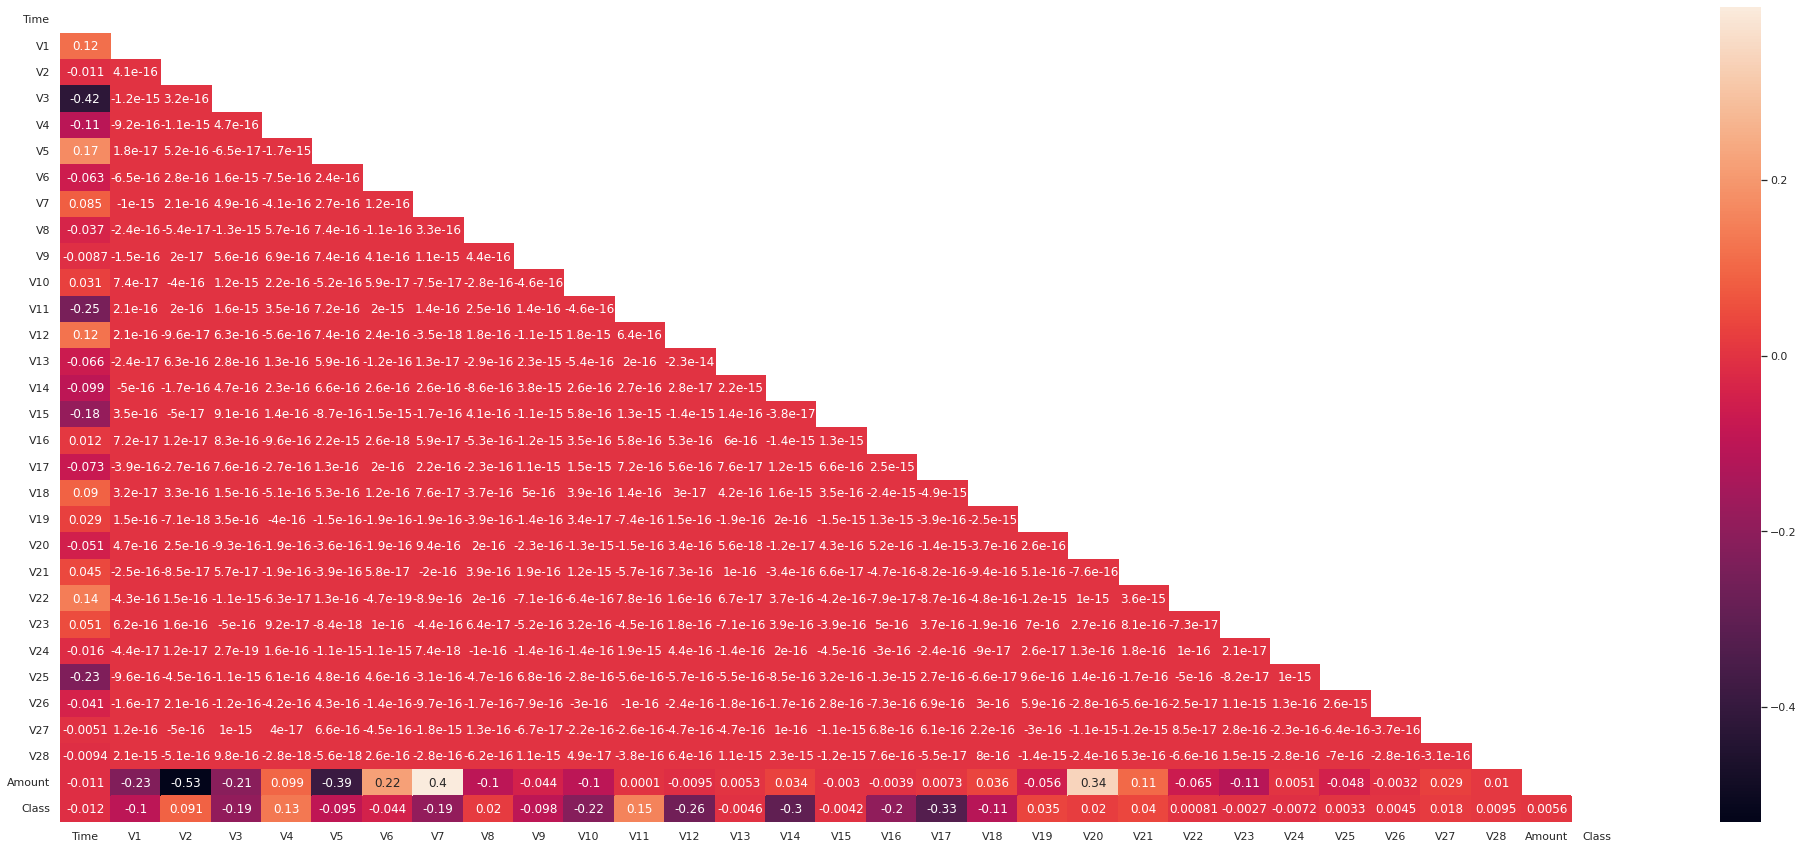

In [ ]:
# Plot das correlações
fig, ax = plt.subplots(figsize=(35,15))
ax = sns.heatmap(correlacao, annot=True, mask=mask)

- Pode ser visto que não existe nenhuma correlação entre os dados de V1 até V28.

- A média desses atributos é 0, com desvio padrão padrão próximo de 1.

- Para o atributo Amount há algumas correlações que podem ser interessantes com V2, V5. V7 e V20.

- Não há grandes correlações entre os atributos e o nosso target (Fraude e Não Fraude).

Há valores ausentes no dataset?

Com a célula abaixo vemos que não há dados faltantes.

In [ ]:
df.isna().sum().sum()

0

**Os dados são balanceados ou não?**

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.Class.value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

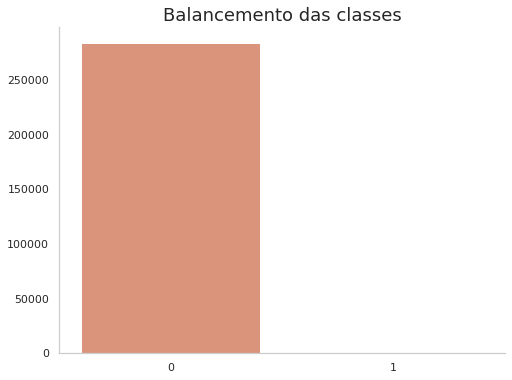

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=df.Class.value_counts().index, y=df.Class.value_counts().values)
ax.set_title('Balancemento das classes', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

Vemos que os dados são altamente desbalanceados.

**Existem 284315 registros de transações sem problemas e apenas 492 registros de fraudes, o que dá menos de 1% dos dados.**

Agora, vamos ver a distribuição das transações por classe.

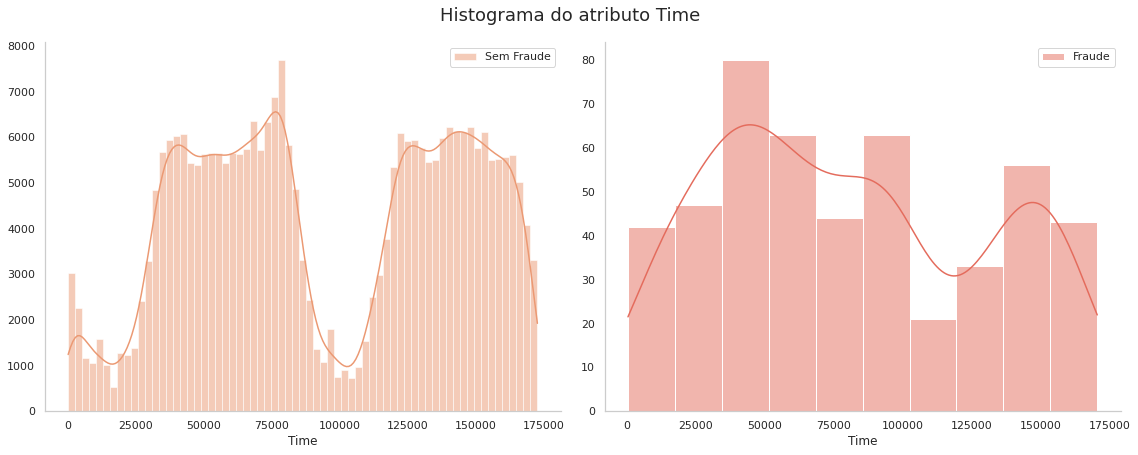

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

fig.suptitle('Histograma do atributo Time', fontsize=18, y=1.05)

ax0 = sns.histplot(data=df[df.Class == 0].Time, kde=True, color=colors[0], label='Sem Fraude', ax=ax0)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
ax0.legend()
ax0.set_ylabel('Quantidade').set_visible(False)

ax1 = sns.histplot(data=df[df.Class == 1].Time, kde=True, color=colors[2], label='Fraude', ax=ax1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
ax1.legend()
ax1.set_ylabel('Quantidade').set_visible(False)

plt.tight_layout()

Com o histórico de transações segmentado, pode ser visto um padrão bem interessante nos dados:
- A tendência de ter mais ou menos fraudes acompanha o fluxo de transações normais no dia. Claro que nas suas devidas proporções.

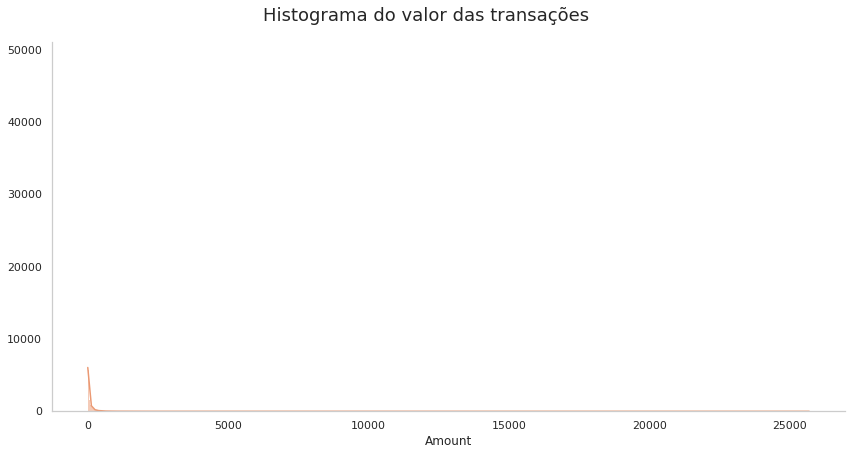

In [ ]:
# Histograma do valor das transações
fig, ax0 = plt.subplots(figsize=(12,6))

fig.suptitle('Histograma do valor das transações', fontsize=18, y=1.05)

ax0 = sns.histplot(data=df.Amount, kde=True, color=colors[0], ax=ax0)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
ax0.set_ylabel('Quantidade').set_visible(False)

plt.tight_layout()

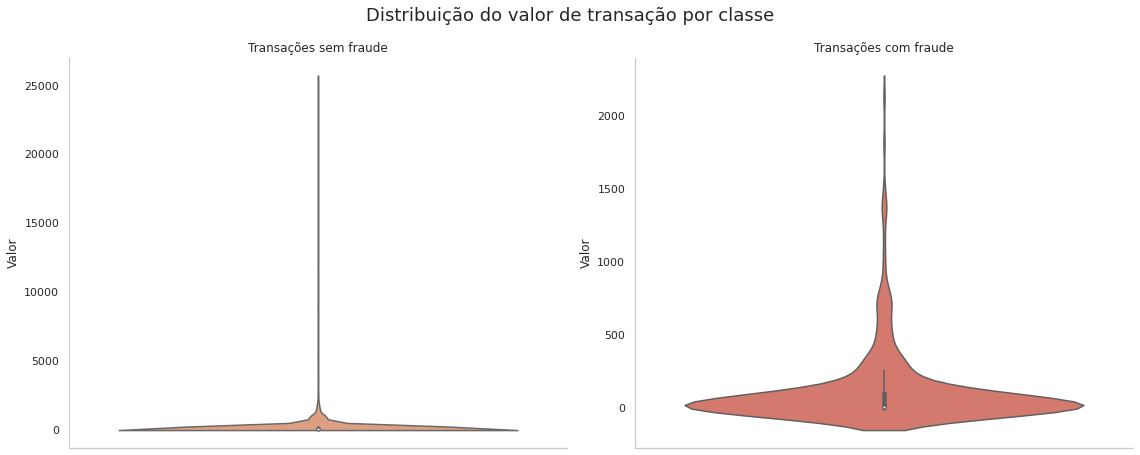

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

fig.suptitle('Distribuição do valor de transação por classe', fontsize=18, y=1.05)

ax0 = sns.violinplot(data=df[df.Class == 0], y='Amount', color=colors[0], label='Sem Fraude', ax=ax0)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
ax0.set_title('Transações sem fraude')
ax0.set_ylabel('Valor')

ax1 = sns.violinplot(data=df[df.Class == 1], y='Amount', color=colors[2], label='Sem Fraude', ax=ax1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
ax1.set_title('Transações com fraude')
ax1.set_ylabel('Valor')

plt.tight_layout()

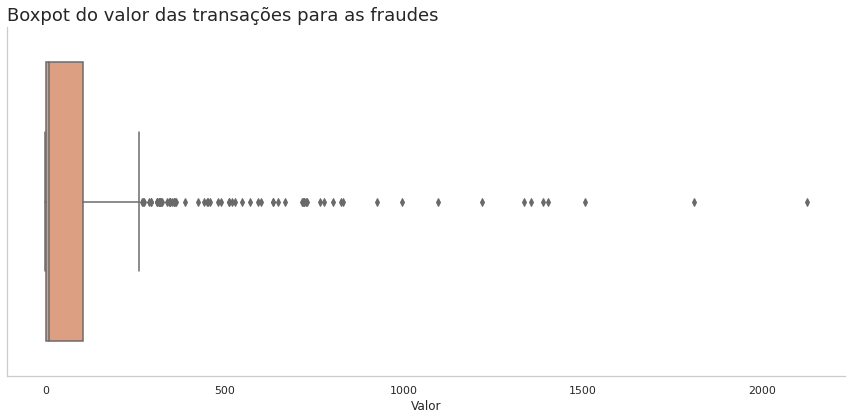

In [ ]:
fig, ax0 = plt.subplots(figsize=(12,6))

ax0 = sns.boxplot(x=df[df.Class == 1].Amount, orient='h', color=colors[0], ax=ax0)
ax0.set_title('Boxpot do valor das transações para as fraudes', loc='left', fontsize=18)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
ax0.set_xlabel('Valor')

plt.tight_layout()

In [ ]:
df[df.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Com os gráficos entendemos que a maioria das fraudes são de baixo valor, 75% das fraudes tem valor abaixo de 105.89€

Como os dados estão bem desbalanceados e queremos detectar as fraudes, não irei desconsiderar os dados que são indicados como outliers. Manterei todos os dados de fraude para a etapa de modelagem.

**Olhando o dado do tempo com mais detalhe**

O atributo de tempo informa os segundos passados após a primeira transação.

Irei trabalhar na construção de um dado que informe a hora da transação.

Aqui irei considerar o que a amostra dos dados começa no horário 00:00:00.

Como são dois dias de registros, os dias não importam. Apenas os dados de horas, minutos e segundos serão importante neste caso.

In [ ]:
# Criando nova coluna
df['hora'] = 0

In [ ]:
# Definindo a primeira transação
df.loc[0, 'hora'] = pd.to_datetime('00:00:00')

In [ ]:
# Definindo o tempo passado em segundos para as proximas transações
df.loc[1:, 'hora'] = df.loc[0, 'hora'] + pd.to_timedelta(df.loc[1:, 'Time'], unit='sec')

In [ ]:
df['hora'] = pd.to_datetime(df['hora'])

In [ ]:
# Verificando a nova coluna
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hora
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,2022-09-06 00:00:00
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2022-09-06 00:00:00
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2022-09-06 00:00:01
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2022-09-06 00:00:01
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2022-09-06 00:00:02


In [ ]:
# Criando nova coluna para pegar apenas a hora (0-23)
df['hora-dia'] = df['hora'].dt.hour

In [ ]:
# Olhando 5 amostras aleaotórias para ver a hora
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hora,hora-dia
278779,168428.0,2.256505,-1.397787,-1.023714,-1.679653,-1.075999,-0.299674,-1.182048,-0.024603,-1.448829,1.747104,0.686086,-0.321554,-0.087659,-0.116834,-0.789689,-0.456070,0.341043,0.327406,0.089264,-0.439514,-0.119964,0.097080,0.268040,0.675381,-0.211835,-0.209664,0.000672,-0.055617,15.00,0,2022-09-07 22:47:08,22
213440,139257.0,-0.253236,-4.485340,-2.161085,-0.082078,-1.570718,0.433778,0.793495,-0.188488,1.200101,-0.762771,0.527998,0.890181,0.335391,0.370121,0.715982,0.775148,-0.940609,1.034459,0.191584,2.320318,0.911036,0.017412,-0.913341,0.324342,-0.720183,0.557468,-0.273297,0.147251,1201.20,0,2022-09-07 14:40:57,14
135661,81344.0,-7.353142,7.127061,-3.698941,-0.789577,-1.547180,-1.275001,-0.089898,1.084567,5.008664,9.239011,0.076114,0.639611,0.036241,-1.009414,1.281491,-1.278382,0.204065,-0.978067,-0.938335,3.890436,-0.637081,0.020654,0.562797,-0.045823,0.861346,-0.243089,3.438036,1.969655,1.79,0,2022-09-06 22:35:44,22
207148,136539.0,-2.733720,-1.070357,1.419555,-0.282660,-0.937096,-0.356292,0.336009,0.433972,0.282629,-1.082725,-1.115842,-0.015719,0.116355,-0.088863,0.616839,0.874107,-0.504364,0.242195,-0.384446,0.279063,0.072056,-0.114117,-0.161746,0.100724,0.290339,0.581117,0.114984,-0.075860,298.97,0,2022-09-07 13:55:39,13
94108,64737.0,-1.143349,-0.070146,1.553871,0.304079,1.321460,0.091277,0.089730,0.458773,-0.308272,-0.616455,1.042388,0.758893,-0.985049,0.275960,-1.145813,-0.573062,0.043846,-0.779959,-1.148438,-0.095671,0.093704,0.151602,-0.070108,-0.304457,0.353054,-0.456286,0.008236,0.005325,8.12,0,2022-09-06 17:58:57,17


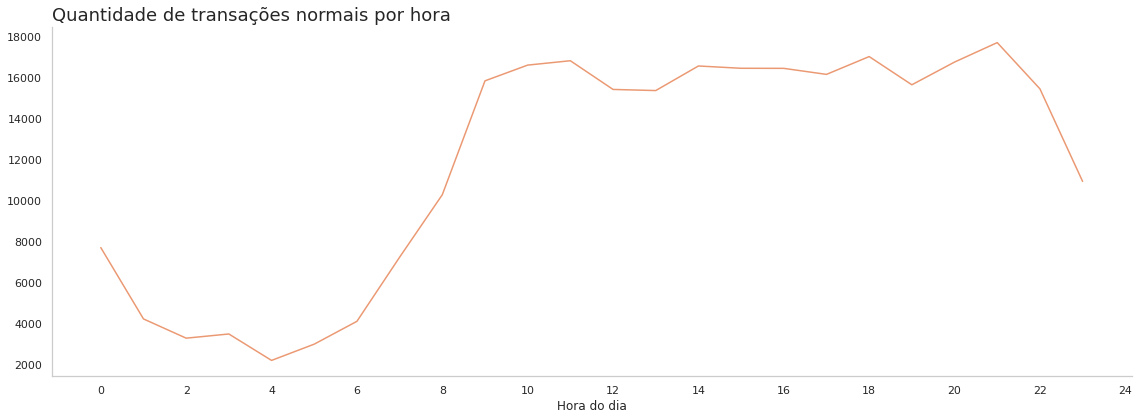

In [ ]:
# Contabilizando as transações normais por hora

fig, ax0 = plt.subplots(figsize=(16,6))

ax0 = sns.lineplot(data=df[df.Class == 0].groupby('hora-dia').count()['Amount'], color=colors[0], ax=ax0)
ax0.set_title('Quantidade de transações normais por hora', loc='left', fontsize=18)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.locator_params(axis='x', nbins=24)
ax0.grid(False)
ax0.set_ylabel('Quantidade').set_visible(False)
ax0.set_xlabel('Hora do dia').set_visible(True)

plt.tight_layout()

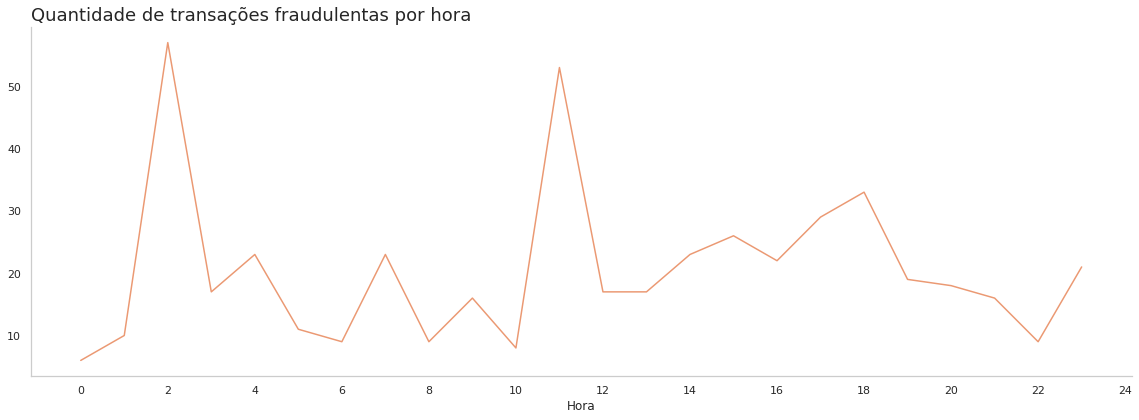

In [ ]:
# Contabilizando as transações fraudulentas por hora

fig, ax0 = plt.subplots(figsize=(16,6))

ax0 = sns.lineplot(data=df[df.Class == 1].groupby('hora-dia').count()['Amount'], color=colors[0], ax=ax0)
ax0.set_title('Quantidade de transações fraudulentas por hora', loc='left', fontsize=18)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.locator_params(axis='x', nbins=24)
ax0.grid(False)
ax0.set_ylabel('Quantidade').set_visible(False)
ax0.set_xlabel('Hora').set_visible(True)

plt.tight_layout()

Podemos ver uma curva interessante para esses dados.

- Há uma intensidade muito maior de transações entre 8h e 21h.

- Há dois momentos do dia em que as transações fraudulentas ocorrem com mais intensidade, 2h e 11h.

**Irei considerar esta informação no lugar dos segundos originais.**

## **Preparação dos Dados**

Etapa de preparação dos dados para o treino.

In [ ]:
# Olhando os dados novamente
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hora,hora-dia
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,2022-09-06 00:00:00,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2022-09-06 00:00:00,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2022-09-06 00:00:01,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2022-09-06 00:00:01,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2022-09-06 00:00:02,0


In [ ]:
# Excluindo o dado de tempo
df.drop(labels=['Time', 'hora'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hora-dia
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [ ]:
# Reordenando a coluna classe
classe = df['Class']
df.drop(labels='Class', axis=1, inplace=True)
df['Class'] = classe
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hora-dia,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


**Agora vamos organizar X e y para separar os dados.**

In [ ]:
# Seprando X
X = df.iloc[:, :-1]
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hora-dia
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separando y
y = df.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

Divisão dos dados de treino, validação e teste.

Vou dividir os dados, de forma estratificada pela classe, da seguinte forma:

- 70% treino
- 15% validação
- 15% teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separando os dados de treino 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True)

In [ ]:
# Separando os dados de validação e teste
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, shuffle=True)

In [ ]:
# Vamos ver o shape das amostras separadas
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'y_val: {y_val.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (199364, 30)
y_train: (199364,)
X_val: (42721, 30)
y_val: (42721,)
X_test: (42722, 30)
y_test: (42722,)


In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hora-dia
268776,1.751563,0.126613,-0.126487,3.490291,0.210299,1.056099,-0.465811,0.327719,-0.769237,1.546282,0.141054,0.251373,0.069010,0.149900,-0.680899,1.830582,-1.511841,0.461482,-1.255695,-0.096927,-0.093830,-0.523613,0.347385,0.185903,-0.562446,-0.397773,-0.013708,-0.020841,68.08,21
70446,1.194518,-1.122428,1.554798,-0.438818,-2.135175,-0.069661,-1.551171,0.311736,0.017087,0.718662,0.814776,0.044984,-0.970108,-0.195234,0.183593,-0.715173,-0.202385,2.080701,-0.744549,-0.476940,-0.138240,0.068262,0.057047,0.566527,-0.098042,1.120187,-0.007611,0.021225,38.23,14
217477,2.211938,-0.706072,-1.146661,-0.778040,-0.874332,-1.623185,-0.393177,-0.376129,-0.409254,0.906828,-0.374575,-0.995428,-0.877574,0.255661,0.450520,0.746313,0.412234,-1.407931,0.206357,-0.144512,0.446552,1.298858,0.067875,0.433867,0.104862,0.050843,-0.039365,-0.066343,1.00,15
92437,-0.681786,0.459552,1.483029,-0.583329,0.052945,2.131184,-1.521800,-1.838976,-0.419421,-1.232790,1.930088,0.697997,-1.536379,1.003630,1.302493,-0.095631,0.407935,-1.322354,-2.489062,0.380487,-1.048230,0.953077,-0.125980,-1.009102,0.918726,0.654804,0.010648,0.139444,17.85,17
109902,-0.751495,0.852878,2.269569,-0.644681,0.459647,-0.692074,1.301416,-0.496787,-0.613085,-0.149753,1.640032,0.695300,0.163544,-0.162134,-0.321848,0.302437,-0.993272,-0.101172,-0.378261,0.070891,-0.168047,-0.312885,-0.293786,0.539119,0.216291,-0.012190,-0.486729,-0.386514,13.32,19


Agora com os dados separados é possível fazer os processamentos adequados sem deixar vazar informações de um conjunto de dados para outro.

Vamos processar os dados de treino.

### Pré processamento dos dados

Irei usar a [padronização](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) nos dados de amount e hora-dia

In [ ]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

In [ ]:
# Criando o transformer
scalerX = StandardScaler()

In [ ]:
# treinando o transformer
scalerX.fit(X_train[['Amount', 'hora-dia']])

StandardScaler()

In [ ]:
# Aplicando o transformer
X_scaled = scalerX.transform(X_train[['Amount', 'hora-dia']])
X_scaled

array([[-0.08292048,  1.19063518],
       [-0.20301025, -0.00881226],
       [-0.35279055,  0.16253737],
       ...,
       [ 0.25731373, -0.6942108 ],
       [-0.28041484,  1.19063518],
       [-0.26565003, -0.6942108 ]])

In [ ]:
# Ataulzaindo X de treino
X_train[['Amount', 'hora-dia']] = X_scaled
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hora-dia
268776,1.751563,0.126613,-0.126487,3.490291,0.210299,1.056099,-0.465811,0.327719,-0.769237,1.546282,0.141054,0.251373,0.069010,0.149900,-0.680899,1.830582,-1.511841,0.461482,-1.255695,-0.096927,-0.093830,-0.523613,0.347385,0.185903,-0.562446,-0.397773,-0.013708,-0.020841,-0.082920,1.190635
70446,1.194518,-1.122428,1.554798,-0.438818,-2.135175,-0.069661,-1.551171,0.311736,0.017087,0.718662,0.814776,0.044984,-0.970108,-0.195234,0.183593,-0.715173,-0.202385,2.080701,-0.744549,-0.476940,-0.138240,0.068262,0.057047,0.566527,-0.098042,1.120187,-0.007611,0.021225,-0.203010,-0.008812
217477,2.211938,-0.706072,-1.146661,-0.778040,-0.874332,-1.623185,-0.393177,-0.376129,-0.409254,0.906828,-0.374575,-0.995428,-0.877574,0.255661,0.450520,0.746313,0.412234,-1.407931,0.206357,-0.144512,0.446552,1.298858,0.067875,0.433867,0.104862,0.050843,-0.039365,-0.066343,-0.352791,0.162537
92437,-0.681786,0.459552,1.483029,-0.583329,0.052945,2.131184,-1.521800,-1.838976,-0.419421,-1.232790,1.930088,0.697997,-1.536379,1.003630,1.302493,-0.095631,0.407935,-1.322354,-2.489062,0.380487,-1.048230,0.953077,-0.125980,-1.009102,0.918726,0.654804,0.010648,0.139444,-0.285001,0.505237
109902,-0.751495,0.852878,2.269569,-0.644681,0.459647,-0.692074,1.301416,-0.496787,-0.613085,-0.149753,1.640032,0.695300,0.163544,-0.162134,-0.321848,0.302437,-0.993272,-0.101172,-0.378261,0.070891,-0.168047,-0.312885,-0.293786,0.539119,0.216291,-0.012190,-0.486729,-0.386514,-0.303226,0.847936


In [ ]:
# Salvando o meu transformer
dump(scalerX, open('scalerX.pkl', 'wb'))

Ok!

Agora vou transformar os dados de validação.

In [ ]:
# Transformando X de validação
X_val_scaled = scalerX.transform(X_val[['Amount', 'hora-dia']])
X_val_scaled

array([[-0.3286519 ,  0.67658628],
       [-0.31255947,  0.16253737],
       [-0.17979692, -2.40770715],
       ...,
       [ 0.18534033,  1.36198482],
       [-0.29646704,  1.01928555],
       [-0.33271524,  0.16253737]])

In [ ]:
# Atualizando X de validação
X_val[['Amount', 'hora-dia']] = X_val_scaled
X_val.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hora-dia
245503,-0.740080,0.729617,-1.521474,-2.985472,-0.425589,-1.857866,0.167410,0.299015,-2.792222,0.940913,-1.464953,-0.727750,0.786559,0.540863,-1.194077,-0.654473,0.513848,-0.225424,-0.856471,-0.431398,0.126366,0.734650,-0.110463,-0.090841,-0.200972,-0.137689,0.276040,0.192667,-0.328652,0.676586
71544,1.457665,-0.584446,0.396655,-0.866750,-0.858737,-0.300287,-0.842416,-0.079728,-0.516689,0.612479,-1.106722,-0.788791,0.728773,-0.455764,1.033398,1.624420,-0.249441,-0.753847,0.682900,0.132448,0.240366,0.659298,-0.204947,-0.543342,0.589271,-0.045470,0.026611,0.013048,-0.312559,0.162537
1443,1.380183,-1.162585,0.549074,-1.559286,-1.303020,0.088948,-1.196364,0.099554,-2.046936,1.512822,1.269629,0.043931,0.903047,-0.250905,0.288657,-0.204054,0.310743,0.025208,-0.197028,-0.244304,-0.287749,-0.526798,0.124105,-0.340929,0.075154,-0.382450,0.052137,0.019236,-0.179797,-2.407707
146660,-1.256971,1.373941,0.064499,-2.932661,0.950927,-0.592621,1.209047,-0.001957,0.297529,-0.164167,0.674253,1.000256,0.501345,-0.011621,-1.153877,0.494695,-1.249327,-0.336473,-0.474850,0.378877,-0.341485,-0.766109,-0.115015,0.363848,0.126299,0.352458,0.539276,0.341849,-0.336698,-2.407707
89446,-0.953714,-0.094607,0.907259,-1.180447,-0.141167,-0.459803,1.357438,-0.045821,-0.452204,-0.890551,0.537321,0.014977,-1.146384,0.395487,-1.028976,0.227549,-0.447455,0.058759,0.320465,0.342870,0.129262,-0.036564,0.163565,0.055604,0.151409,1.328000,-0.137825,0.074458,0.439762,0.505237


### Vamos agora tratar o desbalanceamento.

In [ ]:
print(y_train.value_counts())
print()
print(y_train.value_counts(normalize=True)*100)

0    199020
1       344
Name: Class, dtype: int64

0    99.827451
1     0.172549
Name: Class, dtype: float64


In [ ]:
print(y_val.value_counts())
print()
print(y_val.value_counts(normalize=True)*100)

0    42647
1       74
Name: Class, dtype: int64

0    99.826783
1     0.173217
Name: Class, dtype: float64


Podemos ver que com o split estratificado mantemos a mesma proporção dos dados se comparado ao dataset original sem divisão.

Como a diferença é muito grande, suponho que fazer um tratamento com under sampling não é uma boa opção.

Para fins de comparação irei trabalhar com duas técnicas de balanceamento:

- [Random under-sampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
- [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

**Balanceamento com RandomUnderSampler**

In [ ]:
# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print(f'Shape do X_train com Under Sampling: {X_train_rus.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_rus.shape}')

print(f'Valores únicos das classes: {np.unique(y_train_rus, return_counts=True)}')

Shape do X_train com Under Sampling: (688, 30)
Shape do y_train com Under Sampling: (688,)
Valores únicos das classes: (array([0, 1]), array([344, 344]))


**Balanceamento com SMOTE**

In [ ]:
# Balanceamento dos dados
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Shape do X_train com Under Sampling: {X_train_smote.shape}')
print(f'Shape do y_train com Under Sampling: {y_train_smote.shape}')

print(f'Valores únicos das classes: {np.unique(y_train_smote, return_counts=True)}')

Shape do X_train com Under Sampling: (398040, 30)
Shape do y_train com Under Sampling: (398040,)
Valores únicos das classes: (array([0, 1]), array([199020, 199020]))


## **Modelagem**

Treinamento e validações de métricas

**Definindo um baseline**

Vou criar um modelo base com o dummy classifier para ter uma base de comparação.

In [ ]:
# Imports necessários para esta etapa
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
# Modelo dummy
dummy_credit = DummyClassifier()

In [ ]:
# Treino do modelo
dummy_credit.fit(X_train, y_train)

DummyClassifier()

In [ ]:
# Predições dos dados de validação
y_dummy = dummy_credit.predict(X_val)
y_dummy

array([0, 0, 0, ..., 0, 0, 0])

**Cálculo da Acurácia** 

Quantidade de acertos do modelo.

In [ ]:
accuracy_score(y_val, y_dummy)

0.9982678308092039

**Cálculo da precisão**

A precisão é a razão TP / (TP + FP) onde TP é o número de verdadeiros positivos e FP o número de falsos positivos. 

A precisão é, intuitivamente, a capacidade do classificador não rotular como positiva uma amostra que é negativa.

In [ ]:
precision_score(y_val, y_dummy, zero_division=0)

0.0

**Cálculo do Recall (Revocação).**

O recall é a razão TP / (TP + FN) onde TP é o número de verdadeiros positivos e FN o número de falsos negativos.

O recall é, intuitivamente, a habilidade do classificador em encontrar todas as amostras positivas (Fraudes).

In [ ]:
recall_score(y_val, y_dummy, pos_label=1)

0.0

**Cálculo da Precisão Média**

Esse cálculo avalia a precisão e o recall, variando os valores de limiar da decisão.

**O melhor valor é 1 e o pior valor é 0.**

In [ ]:
# Probabilidade das predições para a classe positiva (Usar nas métricas de precision e ROC-AUC)
y_dummy_prob = dummy_credit.predict_proba(X_val)[:,1]

In [ ]:
average_precision_score(y_val, y_dummy_prob, pos_label=1)

0.0017321691907960957

**Matriz de confusão**

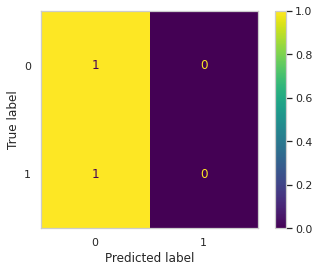

In [204]:
ConfusionMatrixDisplay.from_predictions(y_val, y_dummy, normalize='true')
plt.grid(False)

**Cálculo da curva ROC**

Calcular a área sob a curva característica de operação do receptor (ROC-AUC) a partir de pontuações de previsão.

In [ ]:
roc_auc_score(y_val, y_dummy_prob)

0.5

Analisando os resultados vemos uma valor muito alta para o score geral que é a acurácia. Porém, ao olhar a precisão média temos um valor muito baixo quase zero. Ao olharmos o recall é resultado é zero.

Com a matriz de confusão vemos que o modelo acerta todas as predições da classe 0 e erra todas as predições da classe 1. **Isso é reflexo dos dados altamente desbalanceados.**

O valor de 0.5 para a curva ROC indica que o modelo é a mesma coisa de um preditor aleatório, ou seja, chuta tudo 0 e ver o que acontece. **O modelo totalmente burro!**

**Vou colocar todas as análises realizadas acima em uma função para replicar nos próximos modelos.**

In [ ]:
def metrics(nome, y_val, y_pred, y_proba):
  print(f'Métricas do Modelo {nome}:')
  print()
  print(f'Acurácia: {accuracy_score(y_val, y_pred)}')
  print()
  print(f'Precisão: {precision_score(y_val, y_pred, zero_division=0)}')
  print()
  print(f'Recall: {recall_score(y_val, y_pred, pos_label=1)}')
  print()
  ap = average_precision_score(y_val, y_proba, pos_label=1)
  print(f'Precisão Média: {ap}')
  print()
  print(f'F1-Score: {f1_score(y_val, y_pred, average="micro")}')
  print()
  roc_auc = roc_auc_score(y_val, y_proba)
  print(f'ROC-AUC: {roc_auc}')
  print()
  ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true')
  plt.title('Matriz de Confusão')
  plt.grid(False)
  plt.show()
  print()
  fpr, tpr, _ = roc_curve(y_val, y_proba)
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
  plt.title('Curva de Falso Positivo X Verdadeiro Positivo')
  plt.grid(False)
  plt.show()
  print()
  prec, recall, _ = precision_recall_curve(y_val, y_proba)
  pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision=ap).plot()
  plt.title('Curva de Precisão x Recall')
  plt.grid(False)
  plt.show()

Métricas do Modelo dummy:

Acurácia: 0.9982678308092039

Precisão: 0.0

Recall: 0.0

Precisão Média: 0.0017321691907960957

F1-Score: 0.9982678308092039

ROC-AUC: 0.5



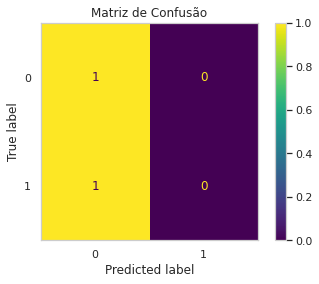

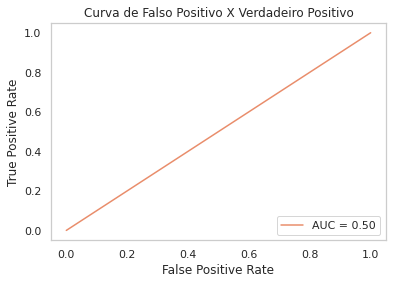

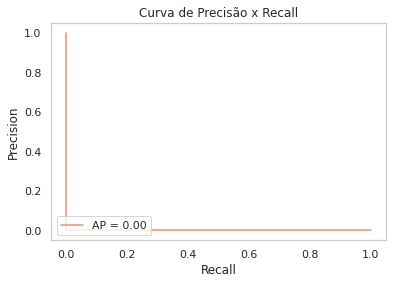

In [ ]:
metrics('dummy', y_val, y_dummy, y_dummy_prob)

### **Avaliar o desempenho dos modelos propostos**

Irei propor os modelos de classificação do tipo:

- Gradiente Descendente
- Gradient Boosting
- Random Forest

São modelos citados no [livro](https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_2_Background/MachineLearningForFraudDetection.html) que trata sobre detecção de fraudes. São modelo que possuem vatagens com relação a acurácia e overfitting.

Obs: Os resultados abaixo já são os mais aceitáveis encontrados após a etapa de validação e alguns hiperparâmetros.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

**SGD Under**

Gradiente Descendente com balanceamento do tipo Random Under Sampling

In [ ]:
sgdc_under = SGDClassifier(loss='modified_huber', max_iter=3000)

sgdc_under.fit(X_train_rus, y_train_rus)

SGDClassifier(loss='modified_huber', max_iter=3000)

In [ ]:
sgdc_under_pred = sgdc_under.predict(X_val)

sgdc_under_proba = sgdc_under.predict_proba(X_val)[:,1]

Métricas do Modelo SGDC Under:

Acurácia: 0.9445705858945249

Precisão: 0.029532403609515995

Recall: 0.972972972972973

Precisão Média: 0.029593021226662002

F1-Score: 0.9445705858945249

ROC-AUC: 0.9594917801004982



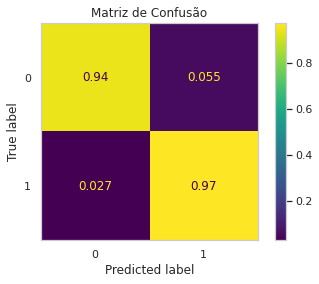

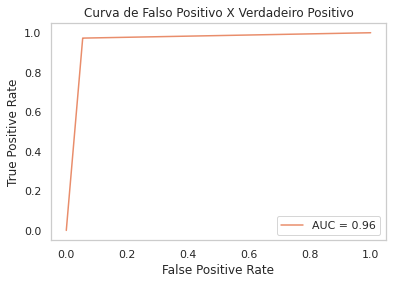

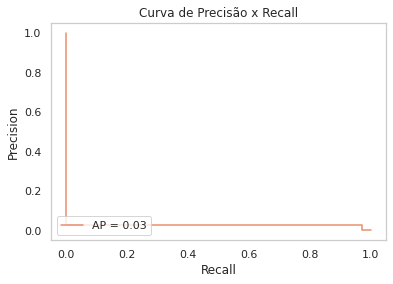

In [ ]:
metrics('SGDC Under', y_val, sgdc_under_pred, sgdc_under_proba)

**SGD SMOTE**

Gradiente Descendente com balanceamento do tipo SMOTE

In [ ]:
sgdc_smote = SGDClassifier(loss='modified_huber', max_iter=3000, learning_rate='adaptive', eta0=0.9)

sgdc_smote.fit(X_train_smote, y_train_smote)

SGDClassifier(eta0=0.9, learning_rate='adaptive', loss='modified_huber',
              max_iter=3000)

In [ ]:
sgdc_smote_pred = sgdc_smote.predict(X_val)

sgdc_smote_proba = sgdc_smote.predict_proba(X_val)[:,1]

Métricas do Modelo SGDC SMOTE:

Acurácia: 0.973900423679221

Precisão: 0.060016906170752324

Recall: 0.9594594594594594

Precisão Média: 0.2948468420471046

F1-Score: 0.973900423679221

ROC-AUC: 0.9921292901690115



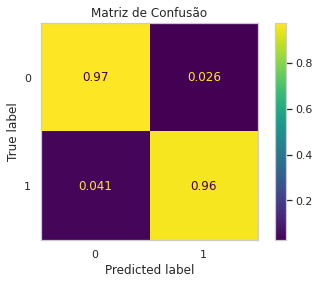

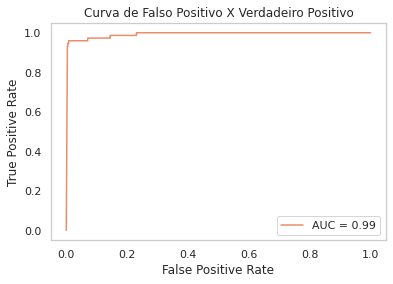

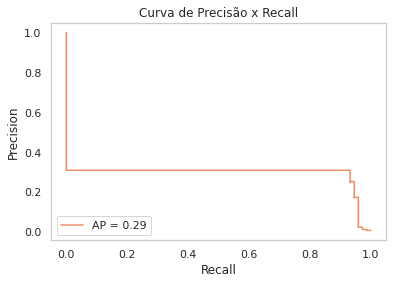

In [ ]:
metrics('SGDC SMOTE', y_val, sgdc_smote_pred, sgdc_smote_proba)

**Gradient Boosting Under**

Gradiente Boosting com balanceamento do tipo Random Under Sampling

In [ ]:
gbc_under = GradientBoostingClassifier(n_estimators=150, max_depth=3)

gbc_under.fit(X_train_rus, y_train_rus)

GradientBoostingClassifier(n_estimators=150)

In [ ]:
gbc_under_pred = gbc_under.predict(X_val)

gbc_under_proba = gbc_under.predict_proba(X_val)[:,1]

Métricas do Modelo Gradient Boosting Under:

Acurácia: 0.9551274548816742

Precisão: 0.035768261964735516

Recall: 0.9594594594594594

Precisão Média: 0.6581426108060022

F1-Score: 0.9551274548816742

ROC-AUC: 0.9922276780027618



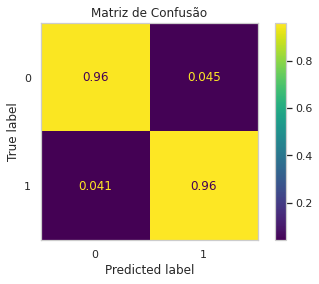

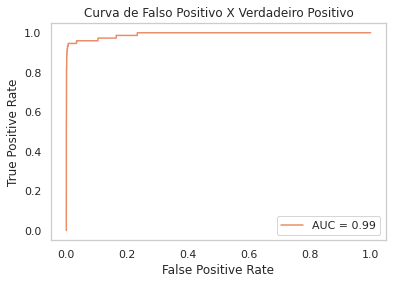

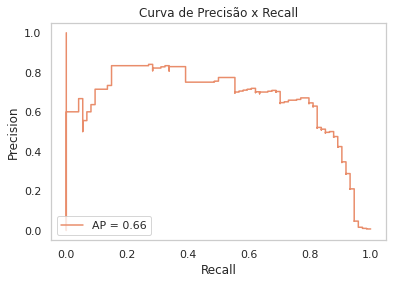

In [ ]:
metrics('Gradient Boosting Under', y_val, gbc_under_pred, gbc_under_proba)

**Gradient Boosting SMOTE**

Gradiente Boosting com balanceamento do tipo SMOTE

In [ ]:
gbc_smote = GradientBoostingClassifier(n_estimators=120, max_depth=2)

gbc_smote.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(max_depth=2, n_estimators=120)

In [ ]:
gbc_smote_pred = gbc_smote.predict(X_val)

gbc_smote_proba = gbc_smote.predict_proba(X_val)[:,1]

Métricas do Modelo Gradient Boosting SMOTE:

Acurácia: 0.9835443926874371

Precisão: 0.09102730819245773

Recall: 0.9459459459459459

Precisão Média: 0.7633265633632431

F1-Score: 0.9835443926874371

ROC-AUC: 0.9914206125838831



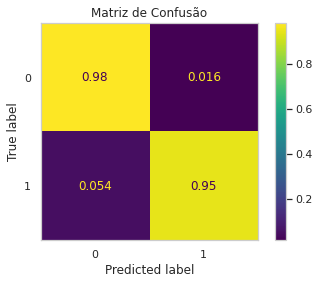

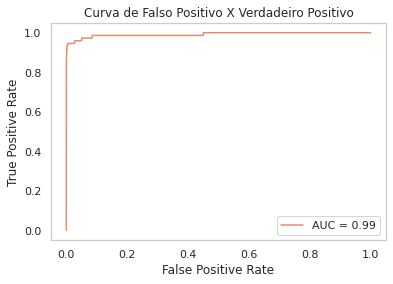

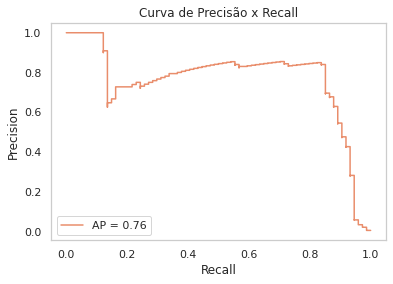

In [ ]:
metrics('Gradient Boosting SMOTE', y_val, gbc_smote_pred, gbc_smote_proba)

**Random Forest Classifier Under**

Random Forest com balanceamento do tipo Random Under Sampling

In [ ]:
rf_under = RandomForestClassifier(n_estimators=120, criterion='entropy')

rf_under.fit(X_train_rus, y_train_rus)

RandomForestClassifier(criterion='entropy', n_estimators=120)

In [202]:
rf_under_pred = rf_under.predict(X_val)

rf_under_proba = rf_under.predict_proba(X_val)[:,1]

Métricas do Modelo Random Forest Under:

Acurácia: 0.9726598160155427

Precisão: 0.05744336569579288

Recall: 0.9594594594594594

Precisão Média: 0.7861966803216005

F1-Score: 0.9726598160155427

ROC-AUC: 0.9943857145301561



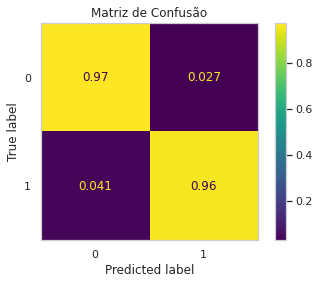

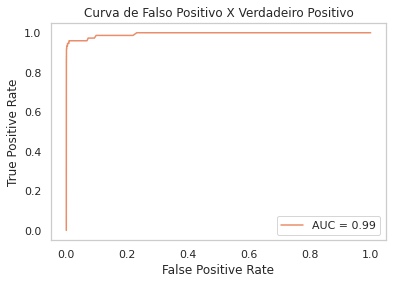

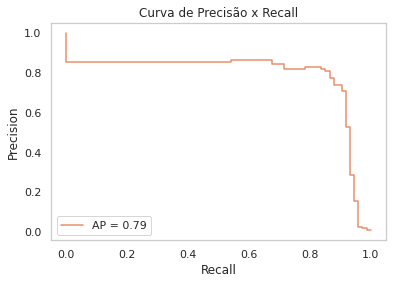

In [203]:
metrics('Random Forest Under', y_val, rf_under_pred, rf_under_proba)

**Random Forest SMOTE**

Gradiente Descendente com balanceamento do tipo SMOTE

In [ ]:
rf_smote = RandomForestClassifier(n_estimators=110, criterion='entropy')

rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', n_estimators=110)

In [ ]:
rf_smote_pred = rf_smote.predict(X_val)

rf_smote_proba = rf_smote.predict_proba(X_val)[:,1]

Métricas do Modelo Random Forest SMOTE:

Acurácia: 0.9996722923152548

Precisão: 0.9054054054054054

Recall: 0.9054054054054054

Precisão Média: 0.9223510171307236

F1-Score: 0.9996722923152548

ROC-AUC: 0.9831897811005368



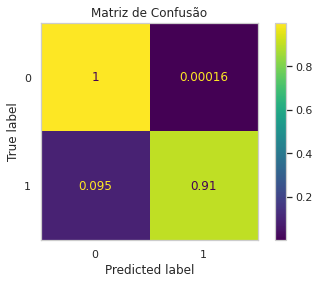

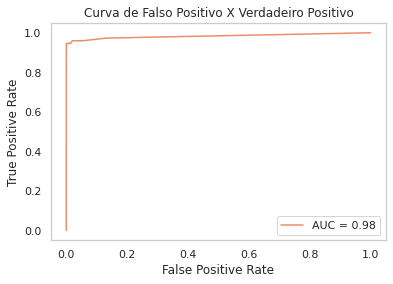

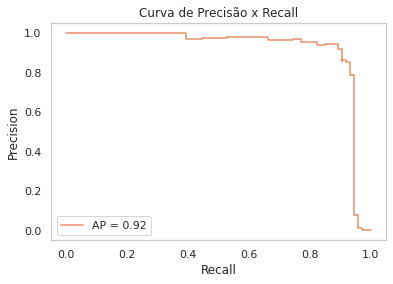

In [ ]:
metrics('Random Forest SMOTE', y_val, rf_smote_pred, rf_smote_proba)

**Análise sobre os modelos:**

Os modelos de Gradiente Descendente possuem um bom recall, acima de 95%, e taxas de precisão muito baixas, abaixo de 1%. Ou seja, eles foram muito bons em acertar as fraudes, mas possuem baixa precisão com relação ao que não é fraude. A precisão média foi baixa e as curvas roc-auc e precision-recall mostram a relação desequilibrada entre as métricas.

Os modelos de Gradient Boosting obtiveram bons resultados de recall, acima de 94% e baixa precisão também. No entanto a precisão média aqui já foi melhor do que o Gradiente Descendente, com valores acima de 65%. As curvas roc-auc e precision-recall mostram a relação mais equilibrada entre as métricas.

Os modelos de random Forest obtiveram recall acima de 90% porém a precisão foi melhor para o modelo treinado com os dados balanceados com SMOTE do que com Random Under Sampling. A precisão média ficou acima de 78%. Olhando as curvas roc-auc e precision-recall vemos uma relação muito mais equilibrada entre as métricas nos dois casos. o modelo treinado com SMOTE foi o que teve o melhor F1-score de todos com 99.97%. Pecisão e Recall foram ambos de 90%.

Olhando para os resultados dos modelos, os de Random Forest parecem ser os melhores. **Logo, irei escolher o modelo de Random Forest balanceado com Random Under Sampling como o mais adequado e testá-lo no conjunto final de teste, pois ele tem o melhor recall e maior ROC AUC entre os dois.** Com isso, busco detectar a maior quantidade de fraudes possível sem prejudicar a detecção das transações normais.

In [ ]:
# Salvando o modelo de random forest com under
filename = 'model_rf_under.sav'
dump(rf_under, open(filename, 'wb'))

## **Avaliação final do modelo**

Formatando os dados de teste

In [ ]:
X_test_scaled = scalerX.transform(X_test[['Amount', 'hora-dia']])
X_test_scaled

array([[-0.00157325,  1.19063518],
       [-0.1421004 ,  0.33388701],
       [ 0.0052258 , -1.55095897],
       ...,
       [-0.35375609, -0.35151153],
       [-0.34731912,  0.84793591],
       [-0.31758835, -0.6942108 ]])

In [ ]:
X_test[['Amount', 'hora-dia']] = X_test_scaled
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hora-dia
123499,-1.142225,-0.016828,2.429659,-0.085870,0.207797,1.804565,-0.104830,0.729434,0.040169,-1.004223,0.176683,0.300919,-0.038614,-0.269521,1.610865,-1.056083,0.945573,-1.706469,-1.541294,0.118214,0.332810,0.996788,0.018614,-0.906266,-0.030368,0.731689,0.078594,0.067308,-0.001573,1.190635
225839,-0.650595,-0.162252,0.146063,-0.567341,1.462230,-0.903275,0.691340,-0.069919,-0.429129,-0.462866,0.222580,0.852463,0.271214,0.311729,-1.409469,0.008738,-0.739206,-0.072853,0.529657,0.178753,0.005885,-0.198340,0.228802,-0.476159,-0.794502,0.143494,0.103937,0.215044,-0.142100,0.333887
12328,-11.781028,5.990147,-9.216360,1.604840,-7.302124,-1.546703,-4.590465,7.414638,0.961962,1.003082,-0.265041,0.585704,1.647440,6.940484,-0.805726,1.884860,3.236230,1.164580,-0.220687,-0.031402,0.122955,-0.511412,-0.521149,0.322004,0.143091,-0.437587,0.022587,-0.122217,0.005226,-1.550959
15949,1.061516,0.625462,0.178129,2.384621,0.413382,-0.122757,0.509773,-0.079938,-1.499710,0.813382,1.752973,1.294695,0.907172,0.550079,-0.370824,0.127990,-0.436120,-0.645949,-1.050866,-0.051780,0.111371,0.270454,-0.105988,0.266943,0.623621,0.060440,-0.026477,0.007098,-0.202246,-1.208260
233537,2.053005,-0.070899,-1.231070,0.183007,0.199156,-0.602378,0.112312,-0.191371,0.224072,0.225239,0.633571,1.287625,0.659669,0.324706,-0.691103,0.202076,-0.745978,-0.292142,0.610976,-0.159284,-0.261891,-0.625503,0.261600,-0.476320,-0.244836,0.205974,-0.071308,-0.073628,-0.348848,0.505237


In [ ]:
y_final = rf_under.predict(X_test)
y_final_prob = rf_under.predict_proba(X_test)

Métricas do Modelo final com os dados de teste:

Acurácia: 0.9735967417255746

Precisão: 0.05489864864864865

Recall: 0.8783783783783784

F1-Score: 0.9735967417255746

Precisão Média: 0.7201919477344203

ROC-AUC: 0.9659405466242833



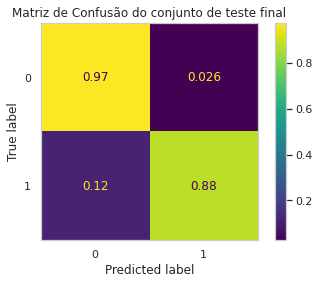

In [ ]:
# Acurácia
print(f'Métricas do Modelo final com os dados de teste:')
print()
print(f'Acurácia: {accuracy_score(y_test, y_final)}')
print()
print(f'Precisão: {precision_score(y_test, y_final, zero_division=0)}')
print()
print(f'Recall: {recall_score(y_test, y_final, pos_label=1)}')
print()
print(f'F1-Score: {f1_score(y_test, y_final, average="micro")}')
print()
ap = average_precision_score(y_test, y_final_prob[:,1], pos_label=1)
print(f'Precisão Média: {ap}')
print()
roc_auc = roc_auc_score(y_test, y_final_prob[:,1])
print(f'ROC-AUC: {roc_auc}')
print()
ConfusionMatrixDisplay.from_predictions(y_test, y_final, normalize='true')
plt.title('Matriz de Confusão do conjunto de teste final')
plt.grid(False)
plt.show()

O resultado do teste final é próximos dos resultados de validação. Isso é um bom sinal!

Ok, chegamos ao final desse processo com um modelo onde podemos dizer que ele **classifica corretamente 88% das fraudes realizadas em transações bancárias**.

Para um problema no qual o dado já veio tratado e não há muito o que se fazer com o conjunto original, sem entender o que todos os atributos significam é um resultado interessante.

Talvez, esse resultado possa até ser melhorado se ténicas mais avançadas forem utilizadas ou se melhorarmos o conjunto original de dados com mais registros.

## **Conclusão**

- Pode ser visto neste projeto que o problema de detecção de fraude não é tão simples e que modelos de Machine Learning podem ser bastante úteis no reconhecimento de padrões. 

- O modelo final obteve um resultado interessante. E, e comparado ao classificador burro, que chuta as predições tudo como classe 0, o modelo treinado é muito superior.

- Avalio que melhores resultados podem ser alcançados, desde que técnicas mais avançadas sejam testadas, tais como cross-validation e grid-search na parametrização dos hiperparâmetros, ou algumas técnicas de Deep Learning também podem ajudar aqui. 